<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Yahoo_Finance_Stock_Data_NSDC_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Yahoo Finance - Stock Data
</h2>

<h3 align="center">
    Name: (Chipo Jaya)
</h3>

### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

Please rename the file to "Yahoo Finance Project - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project.

We'll be using Google Colab for this assignment. This is a Python Notebook environment built by Google that's free for everyone and comes with a nice UI out of the box. For a comprehensive guide, see Colab's official guide [here](https://colab.research.google.com/github/prites18/NoteNote/blob/master/Welcome_To_Colaboratory.ipynb).

Colab QuickStart:
- Notebooks are made up of cells, cells can be either text or code cells. Click the +code or +text button at the top to create a new cell
- Text cells use a format called [Markdown](https://www.markdownguide.org/getting-started/). Cheatsheet is available [here](https://www.markdownguide.org/cheat-sheet/)
- Python code is run/executed in code cells. You can click the play button at the top left of a code block (sometimes hidden in the square brackets) to run the code in that cell. You an also hit shift+enter to run the cell that is currently selected. There is no concurrency since cells run one at a time but you can queue up multiple cells
- Each cell will run code individually but memory is shared across a notebook Runtime. You can think of a Runtime as a code session where everything you create and execute is temporarily stored. This means variables and functions are available between cells if you execute one cell before the other (physical ordering of cells does not matter). This also means that if you delete or change the name of something and re-execute the cell, the old data might still exist in the background. If things aren't making sense, you can always click Runtime -> restart runtime to start over.
- Runtimes will persist for a short period of time so you are safe if you lose connection or refresh the page but Google will shutdown a runtime after enough time has past. Everything that was printed out will remain on the page even if the runtime is disconnected
- Google's Runtimes come preinstalled with all the core python libraries (math, rand, time, etc) as well as common data analysis libraries (numpy, pandas, scikitlearn, matplotlib). Simply run `import numpy as np` in a code cell to make it available.

# **Introduction**

---

This project focuses on applying data science and machine learning techniques to financial market analysis using stock data from Yahoo Finance. It covers a wide range of topics including data preprocessing, exploratory data analysis, technical indicators, trading strategy design, backtesting, portfolio optimization, and predictive modeling.

The project explores moving averages, technical indicators, and trading strategies such as Moving Average Crossover and Mean Reversion. It incorporates machine learning models to forecast stock returns, evaluates their performance using multiple metrics, and visualizes the results. Additionally, it introduces core financial models such as the Capital Asset Pricing Model (CAPM) and the Efficient Frontier.

## Milestone 1: Data Retrieval and Pre-processing


NOTE: Complete these steps on your own. Feel free to discuss any issues or questions with your peers or mentors.

GOAL: Set up your environment, install necessary packages, retrieve stock data, and perform initial data cleaning tasks.

Step 1: Install and Import Libraries

Before diving into data analysis, we need to set up our Python environment with the necessary libraries:

In [1]:
import pandas as pd  # For data manipulation and analysis
import yfinance as yf  # For downloading historical stock data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Step 2: Retrieve Historical Stock Data

Using yfinance, we'll download historical stock data for Apple Inc. (AAPL) from January 1, 2010, to December 31, 2022. Fill in the blanks below:

In [2]:
ticker = 'AAPL' #ticker of the stock you would like to analyze #hint: use the above instructions to fill in these blanks
start_date = '2010-01-01' #start date of the period you want to analyze
end_date = '2022-12-31' #end date of the period
data = yf.download(ticker, start=start_date, end=end_date)

/tmp/ipython-input-3633327064.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [3]:
#run the following to learn a bit more about your dataset
type(data)
data.head()
data.shape

(3272, 5)

Step 3: Clean the Data

We'll remove any missing values and duplicates to ensure the quality of our data for analysis. Use the `dropna` and `drop_duplicates` functions below.

In [4]:
data.dropna(inplace=True)  # Remove missing values
data.drop_duplicates(inplace=True)  # Remove duplicate rows

In [5]:
#See if your dataset has changed
data.shape

(3272, 5)

Learn More:

Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/index.html

yfinance package: https://pypi.org/project/yfinance/

## Milestone 2: Exploratory Data Analysis (EDA)

GOAL: Perform exploratory data analysis to understand stock price trends and compute basic statistical measures.

Step 1: Visualize Stock Prices

Create plots to visualize the stock's closing prices and observe trends over time:

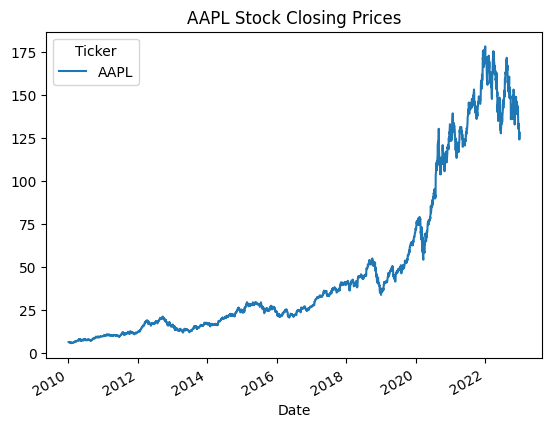

In [6]:
data['Close'].plot(title='AAPL Stock Closing Prices')
plt.show()

Step 2: Statistical Summary

Generate a statistical summary of the stock data using the `describe` function to get insights into its central tendencies and variability:

In [7]:
print(data.describe())


Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   3272.000000  3272.000000  3272.000000  3272.000000  3.272000e+03
mean      48.734500    49.257725    48.172267    48.711389  2.562707e+08
std       47.113218    47.690195    46.493790    47.085333  2.225648e+08
min        5.759780     5.878244     5.705796     5.769376  3.519590e+07
25%       16.379208    16.565677    16.247087    16.378530  1.023541e+08
50%       26.979362    27.194204    26.846944    27.038866  1.666698e+08
75%       54.136748    54.812757    53.745649    54.290144  3.456643e+08
max      178.270340   179.181217   175.439697   178.877588  1.880998e+09


Learn More:

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

EDA techniques: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

## Milestone 3: Moving Averages and Basic Technical Indicators

GOAL: Calculate simple moving averages (SMAs) to understand trends and prepare for strategy development.

Step 1: Calculate SMAs

Calculate 10-day and 50-day simple moving averages for the stock:

In [8]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

In [9]:
data['MA10'].tail()

,MA10
Date,
2022-12-23,134.805296
2022-12-27,133.380788
2022-12-28,131.466662
2022-12-29,130.126875
2022-12-30,129.479638


Step 2: Plot SMAs

Plot the calculated SMAs along with the closing price to visualize the trends:

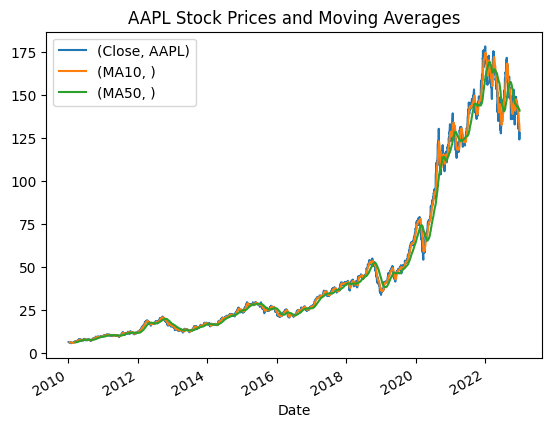

In [11]:
data[['Close', 'MA10', 'MA50']].plot(title='AAPL Stock Prices and Moving Averages')
plt.legend()
plt.show()


Learn More:

Moving Averages: https://investopedia.com/terms/m/movingaverage.asp

Python for Finance: https://pythonforfinance.net

## Milestone 4: Implementing a Moving Average Crossover Strategy

GOAL: Develop a simple moving average crossover trading strategy to generate buy and sell signals.

Step 1: Define the Trading Signals

Generate trading signals based on the crossover of the 10-day and 50-day SMAs:

In [ ]:
data['Signal'] = np.where(data['MA10'] > data['MA50'], 1, 0)
data['Position'] = data['_____'].diff()


In [ ]:
data['Position'].unique()

array([nan,  0.,  1., -1.])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3272 non-null   float64
 1   (High, AAPL)    3272 non-null   float64
 2   (Low, AAPL)     3272 non-null   float64
 3   (Open, AAPL)    3272 non-null   float64
 4   (Volume, AAPL)  3272 non-null   int64  
 5   (MA10, )        3263 non-null   float64
 6   (MA50, )        3223 non-null   float64
 7   (Signal, )      3272 non-null   int64  
 8   (Position, )    3271 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 255.6 KB


Step 2: Visualize the Strategy

Illustrate the trading signals on a plot to identify where the buy and sell actions would occur:

<ipython-input-24-56a413d05fc0>:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data[data['Position'] == 1].index, data['MA10'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')


<Figure size 1000x500 with 0 Axes>

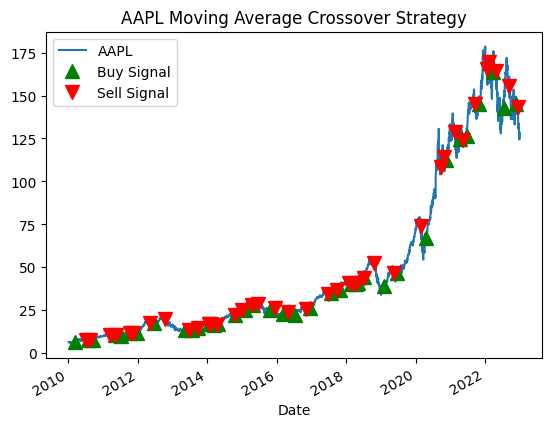

In [ ]:
plt.figure(figsize=(10,5))
data['Close'].plot(title='AAPL Moving Average Crossover Strategy')
plt.plot(data[data['______'] == 1].index, data['______'][data['______'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['______'] == -1].index, data['______'][data['_______'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.legend()
plt.show()


Learn More:

Algorithmic Trading: https://quantstart.com/articles/Quantitative-Finance-Reading-List

Moving Average Strategies: https://investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


##Milestone 5: Backtesting the Strategy

GOAL: Simulate the execution of the trading strategy using historical data to evaluate its hypothetical performance.

Step 1: Prepare Data for Backtesting

Create a new DataFrame to track the positions and portfolio value over time based on the signals generated:

In [ ]:
#TODO: Initialize the portfolio DataFrame with the positions
portfolio = pd.DataFrame(index=data.index)
portfolio['Position'] = data['Position']
if 'Adj Close' not in data.columns:
    data['Adj Close'] = data['Close']
portfolio['Adj Close'] = data['Adj Close']
portfolio['Position'] = data['Position']
portfolio['Holdings'] = (data['Position'].cumsum() * data['Adj Close']).fillna(0)
initial_cash = 100000
portfolio['Cash'] = initial_cash - (data['______'] * data['______']).cumsum()
portfolio['Total'] = portfolio['_____'] + portfolio['Cash']
portfolio['Returns'] = portfolio['Total'].pct_change().fillna(0)
portfolio.tail(50)

,Position,Adj Close,Holdings,Cash,Total,Returns
Date,,,,,,
2022-10-20,0.0,141.321930,0.000000,100094.409400,100094.409400,0.000000
2022-10-21,0.0,145.145950,0.000000,100094.409400,100094.409400,0.000000
2022-10-24,0.0,147.294510,0.000000,100094.409400,100094.409400,0.000000
2022-10-25,0.0,150.142822,0.000000,100094.409400,100094.409400,0.000000
2022-10-26,0.0,147.195923,0.000000,100094.409400,100094.409400,0.000000
2022-10-27,0.0,142.711548,0.000000,100094.409400,100094.409400,0.000000
2022-10-28,0.0,153.493805,0.000000,100094.409400,100094.409400,0.000000
2022-10-31,0.0,151.128387,0.000000,100094.409400,100094.409400,0.000000
2022-11-01,0.0,148.477203,0.000000,100094.409400,100094.409400,0.000000


Step 2: Backtest and Calculate Portfolio Value

Calculate the total value of the portfolio over time, considering the initial capital and the holdings:

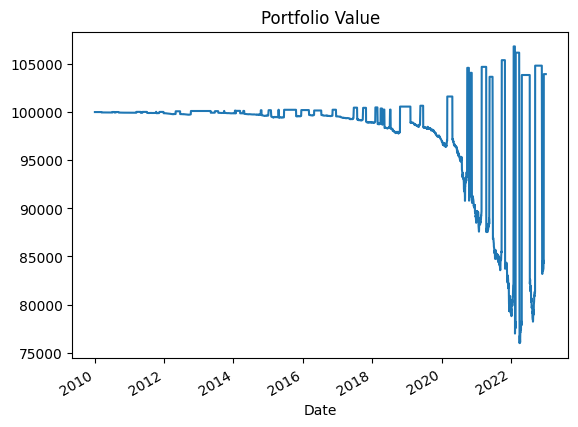

In [ ]:
#TODO: Calculate the total value
initial_capital = 100000  # Starting capital
portfolio['Cash'] = initial_capital - (portfolio['Holdings'].diff() * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['_________'] + portfolio['_______']

portfolio['Total'].plot(title='____________')
plt.show()


Learn More:

Backtrader (backtesting framework): https://backtrader.com

##Milestone 6: Model Selection and Machine Learning Introduction
GOAL: Compare different machine learning models to predict future price movements or stock returns.

Step 1: Feature Engineering

Create features from historical price data that will be used as inputs for the machine learning models:

In [ ]:
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=__).mean()
data['MA__'] = data['_____'].rolling(window=50).mean()
data.head()


Price,Close,High,Low,Open,Volume,MA10,MA50,Signal,Position,Adj Close,Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2010-01-04,6.431897,6.446623,6.382908,6.414465,493729600,NaN,NaN,0,NaN,6.431897,NaN
2010-01-05,6.443016,6.479381,6.409054,6.449628,601904800,NaN,NaN,0,0.0,6.443016,0.001729
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000,NaN,NaN,0,0.0,6.340531,-0.015906
2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200,NaN,NaN,0,0.0,6.328811,-0.001849
2010-01-08,6.370884,6.371486,6.283127,6.320393,447610800,NaN,NaN,0,0.0,6.370884,0.006648


Step 2: Train and Compare Models

Split the data into a training set and a test set, train different models, and evaluate their performance:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
data = yf.download('AAPL', start='2010-01-01', end='2022-12-31')
# TODO: Compute returns and moving averages
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
#TODO - Follow suit for MA50
data['MA50'] = ____________________________________________

# We drop the NaN values after the shifting operation to align the indices
data['Target'] = (data['Returns'].shift(-1) > 0).astype(int)
data.dropna(inplace=True)  # Make sure to drop NaN values to align 'X' and 'y'

# TODO: Prepare the features (X) and target (y)
X = data[['Returns', 'MA10', '____']]
y = data['Target']



[*********************100%***********************]  1 of 1 completed


In [ ]:
#Run the following
data.head()

Price,Close,High,Low,Open,Volume,Returns,MA10,MA50,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2010-03-16,6.745662,6.761591,6.687357,6.737548,446908000,0.002725,6.630915,6.219936,0
2010-03-17,6.735745,6.805771,6.710199,6.759187,450956800,-0.001470,6.675366,6.226013,1
2010-03-18,6.751672,6.762191,6.690361,6.735141,342109600,0.002365,6.717261,6.232186,0
2010-03-19,6.679542,6.769404,6.648886,6.755880,559445600,-0.010683,6.727179,6.238966,1
2010-03-22,6.754678,6.792246,6.616429,6.626047,456419600,0.011249,6.744219,6.247484,1


In [ ]:
# TODO: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(_____, _______, test_size=.5, random_state=42)

rf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression()
svm = SVC()

models = [rf, log_reg, svm]

for model in ______:
    model.fit(______, _______)

predictions = [model._______(_______) for model in models]
for i, model in enumerate(models):
    accuracy = accuracy_score(________, predictions[i])
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")

RandomForestClassifier Accuracy: 0.5142679900744417
LogisticRegression Accuracy: 0.53287841191067
SVC Accuracy: 0.5390818858560794


Learn More:

Scikit-learn documentation: https://scikit-learn.org/stable/documentation.html

Machine Learning Mastery: https://machinelearningmastery.com

##Milestone 7: Performance Metrics and Model Evaluation
GOAL: Evaluate the trained machine learning model using performance metrics.

Step 1: Calculate Performance Metrics

Use confusion matrix and classification report to evaluate model predictions:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
for model in models:
 predictions = model.________(________)

 # Calculate metrics
 conf_matrix = confusion_matrix(______, _______)
 print(conf_matrix)
 report = classification_report(______, ________)
 print(report)


[[372 380]
 [403 457]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       752
           1       0.55      0.53      0.54       860

    accuracy                           0.51      1612
   macro avg       0.51      0.51      0.51      1612
weighted avg       0.52      0.51      0.51      1612

[[142 610]
 [143 717]]
              precision    recall  f1-score   support

           0       0.50      0.19      0.27       752
           1       0.54      0.83      0.66       860

    accuracy                           0.53      1612
   macro avg       0.52      0.51      0.46      1612
weighted avg       0.52      0.53      0.48      1612

[[ 50 702]
 [ 41 819]]
              precision    recall  f1-score   support

           0       0.55      0.07      0.12       752
           1       0.54      0.95      0.69       860

    accuracy                           0.54      1612
   macro avg       0.54      0.51      0.40      1612
weigh

Learn More:

Model evaluation: https://scikit-learn.org/stable/modules/model_evaluation.html

Confusion Matrix: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

##Milestone 8: Reporting and Visualization



GOAL: Develop visual reports and dashboards to represent the model's predictions and performance metrics effectively.

Step 1: Visualize the Confusion Matrix

Create a heatmap to display the confusion matrix for a clear visual representation of the model's performance:



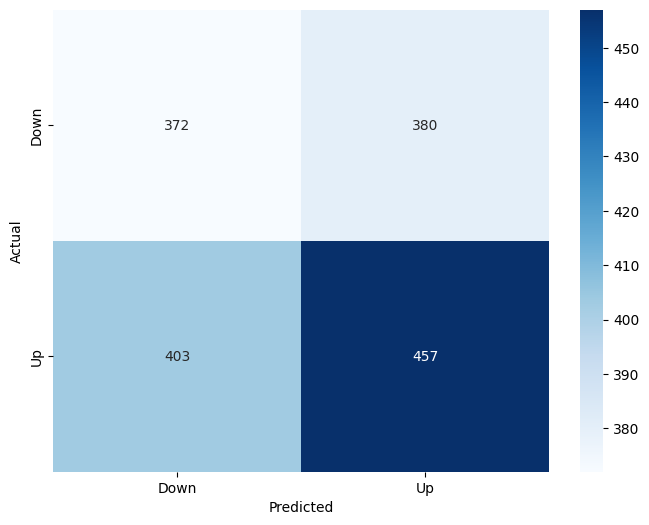

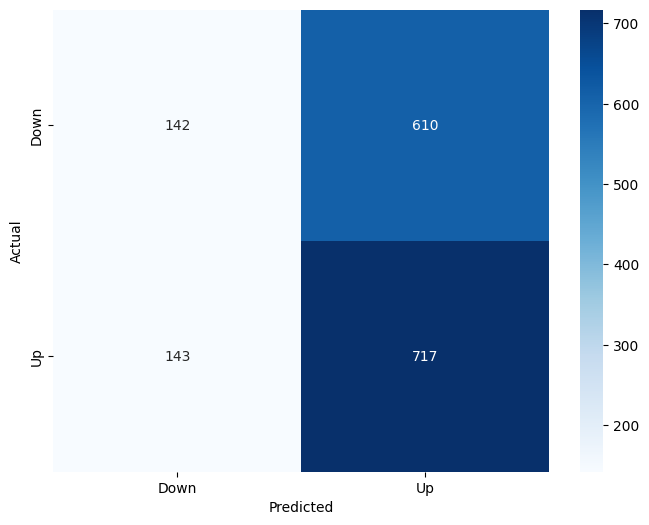

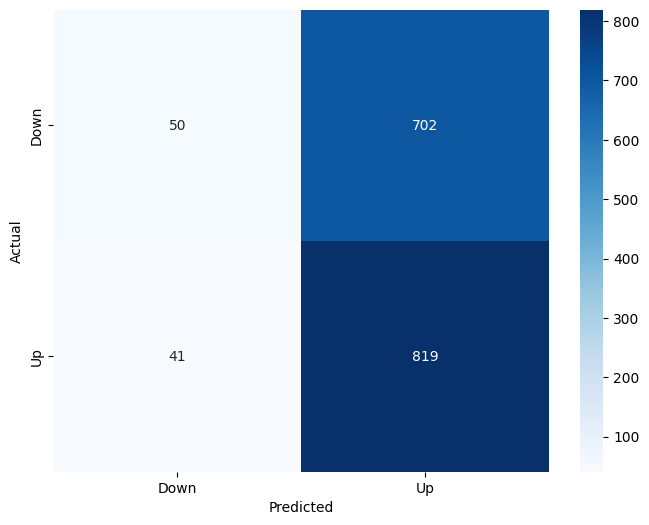

In [ ]:
for model in models:
 predictions = model.predict(______)
 conf_matrix = __________(______, _______)
 plt.figure(figsize=(8, 6))
 sns.heatmap(_________, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
 plt.xlabel('Predicted')
 plt.ylabel('Actual')


NOTE: Visualization aids in the interpretation of complex data and results, making it a crucial part of data science communication.

Seaborn visualizations: https://seaborn.pydata.org/tutorial.html

Feature importance: https://builtin.com/data-science/feature-importance

##Milestone 9 : Capital Asset Pricing Model (CAPM) Parameter Estimation

**Goal**: Estimate each stock's CAPM alpha and beta coefficients by regressing their excess returns against the market's (S&P 500) returns

The Capital Asset Pricing Model is given by the following equation :

$$
R_i - R_f \;=\; \alpha_i \;+\; \beta_i\,(R_m - R_f)\;+\;\varepsilon_i
$$

- **$R_i$**: Actual return of asset *i* (e.g. daily % change).  
- **$R_f$**: Risk-free rate for the same period (e.g. daily T-bill yield).  
- **$(R_i − R_f)$**: Excess return of asset *i* above the risk-free rate.  
- **$R_m$**: Actual return of the market portfolio (e.g. S&P 500).  
- **$(R_m − R_f)$**: Market’s excess return (the risk premium).  
- **$β_i$**: Sensitivity of asset *i* excess return to a 1 % move in the market’s excess return.  
- **$α_i$**: Average “abnormal” return of asset *i* not explained by market moves. The intercept term of the model.
- **$ε_i$**: Residual error term (all other noise/factors).



**Step 1**: Import libraries and download the prices for the stocks and the market index.

In [ ]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

In [ ]:
# We'll grab 1 year of daily closing prices for our stocks + the market index (S&P 500).
tickers = ['TSLA', 'MSFT', 'GS', '^GSPC']
data = yf.download(tickers, period='1y', interval='1d')['Close']

# Rename the market column
data = data.rename(columns={'^GSPC': 'SP500'})

**Step 2** : Calculate returns based on the closing prices



In [ ]:
# pct_change() gives (today - yesterday) / yesterday
returns = data.pct_change().dropna()

# Quick check
returns.head()

In [ ]:
rf_annual = 0.04 # We assume the annual risk free rate to be 4% and then convert it to daily rate

rf_daily  = (1 + ________)**(1/______) - 1    # Hint: the second blank refers to the number of trading days in a year

# Add a column of the calculated daily returns to our data
returns['RF'] = rf_daily

In [ ]:
# Next we create a dataframe consisting of the excess returns each stock compared to the market index which is S&P 500
excess = pd.DataFrame({
    'SP500_exc': returns[_______] - returns['RF'],
})
for stock in ['TSLA','MSFT','GS']:
    excess[f'{stock}_exc'] = returns[stock] - returns[______]

# Take a look at the excess table
excess.head()

In [ ]:
def run_capm(y_exc, x_exc):
    """
    Performs Ordinary Least Square (OLS) regression of y_exc ~ x_exc
    Returns the fitted model so we can inspect alpha & beta.
    """
    X = sm.add_constant(x_exc)      # adds alpha, the intercept
    model = sm.OLS(______, X).fit()  # This will run a regression model on the provided data and return a model with each stock's alpha and beta.
    return model

In [ ]:
# First, we will create a dictionary to store the results for every stock
results = {}

#This will run regression model on each of our stock and return their respective results
for stock in ['TSLA','MSFT','GS']:
    y_exc = excess[f'{stock}_exc']
    x_exc = excess['SP500_exc']
    model = run_capm(______, ______)
    results[stock] = {
        'alpha': model.params['const'],
        'beta' : model.params['SP500_exc'],
        'R2'   : model.rsquared,
    }

# Display results
pd.DataFrame(results).T.rename_axis('Ticker').round(4)

## Milestone 10: Building Efficient Frontier

**Goal** : Build and plot the Efficient frontier for chosen set of stocks



Step 1 : Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Step 2 : Download and prepare the price data for various stocks

In [ ]:
tickers = ["NVDA", "GOOGL", "GS", "LLY", "WMT", "^GSPC"]
start_date = "2023-06-05"
end_date   = "2025-06-05"

In [ ]:
raw_data = yf.download(tickers, start=start_date, end=end_date, progress=True)

/tmp/ipython-input-16-1787448472.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers, start=start_date, end=end_date, progress=True)
[*********************100%***********************]  6 of 6 completed


In [ ]:
prices = raw_data['Close'].copy()

In [ ]:
print(prices.head())

Ticker           GOOGL          GS         LLY       NVDA        WMT  \
Date                                                                   
2023-06-05  125.258774  307.537750  437.968781  39.142860  48.733212   
2023-06-06  126.551033  312.306427  436.795563  38.626236  48.726704   
2023-06-07  121.769699  320.859497  430.190491  37.451950  48.798279   
2023-06-08  121.411858  320.591980  439.348907  38.486317  49.504227   
2023-06-09  121.501320  321.117554  439.723541  38.746159  49.803520   

Ticker            ^GSPC  
Date                     
2023-06-05  4273.790039  
2023-06-06  4283.850098  
2023-06-07  4267.520020  
2023-06-08  4293.930176  
2023-06-09  4298.859863  


Step 3: Compute Daily returns and annual statistics

In [ ]:
# Calculate daily returns and drop any missing values
returns = prices.pct_change().______()


In [ ]:
#Compute mean of the daily returns
mean_daily_returns = returns.mean()
mean_daily_returns

,0
Ticker,
GOOGL,0.000761
GS,0.001493
LLY,0.001351
NVDA,0.003108
WMT,0.001508
^GSPC,0.000719


In [ ]:
#Compute the covariance
cov_matrix_daily = returns.cov()
print(cov_matrix_daily)

Ticker     GOOGL        GS       LLY      NVDA       WMT     ^GSPC
Ticker                                                            
GOOGL   0.000354  0.000114  0.000055  0.000275  0.000045  0.000116
GS      0.000114  0.000325  0.000068  0.000217  0.000070  0.000132
LLY     0.000055  0.000068  0.000475  0.000169  0.000069  0.000077
NVDA    0.000275  0.000217  0.000169  0.001074  0.000057  0.000226
WMT     0.000045  0.000070  0.000069  0.000057  0.000171  0.000057
^GSPC   0.000116  0.000132  0.000077  0.000226  0.000057  0.000103


In [ ]:
#Compute the correlation
corr_matrix_daily = returns.corr()
print(corr_matrix_daily)

Ticker     GOOGL        GS       LLY      NVDA       WMT     ^GSPC
Ticker                                                            
GOOGL   1.000000  0.335727  0.133083  0.445189  0.181690  0.608099
GS      0.335727  1.000000  0.174364  0.368003  0.297493  0.719987
LLY     0.133083  0.174364  1.000000  0.236890  0.241783  0.348646
NVDA    0.445189  0.368003  0.236890  1.000000  0.133598  0.680407
WMT     0.181690  0.297493  0.241783  0.133598  1.000000  0.428934
^GSPC   0.608099  0.719987  0.348646  0.680407  0.428934  1.000000


In [ ]:
# Next, we annualize all the daily statistics by multiplying with 252, which is the number of trading days in a year.
trading_days = 252
mean_annual_returns = _________ * _________
cov_matrix_annual = _______ * __________


volatility_annual = returns.std() * np.sqrt(trading_days)

Step 4 : Run CAPM Regression for each stock ( similar to the previous milestone) to estimate alpha and beta of each stock

In [ ]:

import statsmodels.api as sm

# First, we will prepare returns for the market index anf indivudual stocks
market_ret = returns["^GSPC"]       # daily market (S&P 500) returns
stock_rets = returns.drop(columns="^GSPC")  # the five individual stocks

# For each stock, regress its returns on the market returns
alphas = {}
betas  = {}
for ticker in stock_rets.columns:
    y = stock_rets[ticker]               # dependent variable
    X = sm.add_constant(market_ret)      # add intercept term
    model = sm._____(y, X).fit()           # ordinary least squares
    alphas[ticker] = model.params["const"]
    betas[ticker]  = model.params["^GSPC"]

#Store the alphas and betas neatly in a Pandas table
import pandas as pd

regression_table = pd.DataFrame({
    "Alpha (daily)" : alphas,
    "Beta"          : betas
})

Step 5 : Build and plot the efficient frontier for a 5 stock portfolio

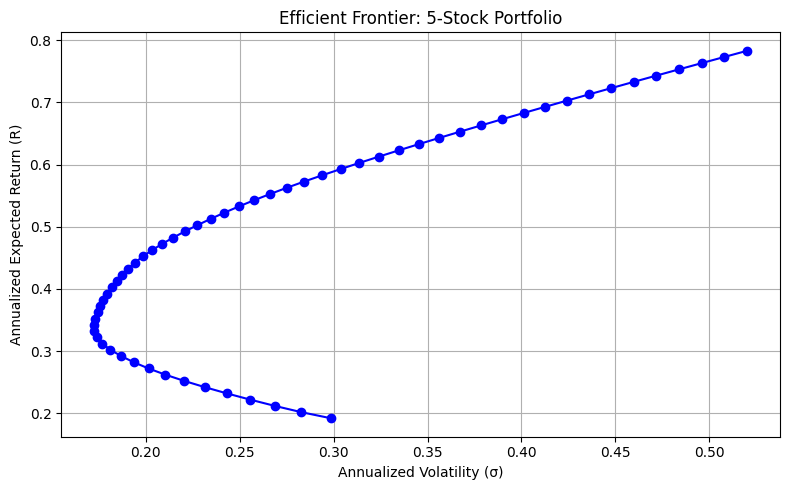

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Helper function to find the portfolio allocation that yields the lowest possible risk
def efficient_frontier(mu, Sigma, n_points=100):
    """
    mu : array of expected returns of the stocks
    Sigma : covariance matrix of the stocks
    Compute a long-only efficient frontier:
      - minimize portfolio volatility σ = sqrt(wᵀ Σ w)
      - subject to: sum(w) = 1, wᵀ mu = R_target, and 0 ≤ w_i ≤ 1
    Returns:
      vols      : array of volatilities (σ) along the frontier
      rets      : matching target returns (R_target)
      weights   : list of optimal weight vectors for each point
    """
    n = len(mu)
    vols, rets, weights = [], [], []

    # spread target returns evenly between worst and best single-stock μ
    R_targets = np.linspace(mu.min(), mu.max(), n_points)

    for R in R_targets:

        # objective: portfolio volatility
        objective = lambda w: np.sqrt(w @ Sigma @ w)

        # constraints:
        #  - fully invested: sum(w) = 1
        #  - achieve target return: wᵀ mu = R
        cons = (
            {"type": "eq", "fun": lambda w: np.sum(w) - 1.0},
            {"type": "eq", "fun": lambda w: w @ mu - R}
        )

        # long-only bounds: 0 ≤ w_i ≤ 1
        bounds = [(0.0, 1.0)] * n

        # start from equal weights
        w0 = np.repeat(1/n, n)

        result = minimize(objective, w0, bounds=bounds, constraints=cons)
        if result.success:
            vols.append(result.fun)      # minimized σ
            rets.append(R)               # target return
            weights.append(result.x)     # optimal weights

    return np.array(vols), np.array(rets), weights


# 2. Annualize daily statistics
trading_days = 252
mu_annual    = returns.mean() * trading_days
Sigma_annual = returns.cov() * trading_days

# 3. Select the five stocks and extract sub-vector & sub-matrix
tickers   = ["NVDA", "GOOGL", "GS", "LLY", "WMT"]
mu_vec    = mu_annual.loc[tickers].values               # shape (5,)
Sigma_sub = Sigma_annual.loc[tickers, tickers].values   # shape (5,5)


# 4. Compute the frontier
vols5, rets5, weights5 = efficient_frontier(mu_vec, Sigma_sub, n_points=60)


# 5. Plot the efficient frontier
plt.figure(figsize=(8, 5))
plt.plot(vols5, rets5, marker='o', linestyle='-', color='blue')
plt.title("Efficient Frontier: 5-Stock Portfolio")
plt.xlabel("Annualized Volatility (σ)")
plt.ylabel("Annualized Expected Return (R)")
plt.grid(True)
plt.tight_layout()
plt.show()


Step 6 : Find the lowest volatility, corresponding return and corresponding weights of the assets

In [ ]:
# Find the index of the smallest volatility in vols5
idx_min = np.argmin(vols5)

# Get the corresponding weight vector from weights5
min_risk_weights = weights5[idx_min]


# Show the results
print("Lowest risk (σ):", vols5[idx_min])
print("Expected return at lowest risk (R):", rets5[idx_min])

for i, ticker in enumerate(tickers):
    weight = min_risk_weights[i]
    print(f"{ticker}: {weight:.3%}")




Lowest risk (σ): 0.1723263893346236
Expected return at lowest risk (R): 0.34222765631310814
NVDA: 0.137%
GOOGL: 17.377%
GS: 16.301%
LLY: 12.629%
WMT: 53.556%


## Milestone 11: Mean Reversion Strategy (Long Only)





Step 1 : Import the libraries and download the price data for any stock

In [ ]:
import datetime
import yfinance as yf
import pandas as pd


initial_capital = 10_000.00   # We start with $10,000
ticker          = "NVDA"      # Nvidia Stock
end_date        = "2025-05-29"
start_date      = "2024-05-29"

# Download daily Close prices for the past year
data   = yf.download(ticker, start=start_date, end=end_date, progress=False)
prices = data["Close"].dropna()
prices

/tmp/ipython-input-10-2076428810.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data   = yf.download(ticker, start=start_date, end=end_date, progress=False)


Ticker,NVDA
Date,
2024-05-29,114.779305
2024-05-30,110.456024
2024-05-31,109.589378
2024-06-03,114.954239
2024-06-04,116.390663
...,...
2025-05-21,131.790848
2025-05-22,132.820786
2025-05-23,131.280884


In [ ]:
# In this code block we will compute the RSI signals and make a decision whether to go long or to stay flat.

# One thing to note here is, for simplification, we assume that we are purchasing fractional shares. That is if we have to go long, we invest all the capital that we have.

import numpy as np
import pandas as pd

# If `prices` is a DataFrame (multi-column), extract the NVDA series
if isinstance(prices, pd.DataFrame):
    prices = prices["NVDA"]

# 1. Calculate daily price changes
delta = prices.diff()

''' 2. Separate gains and losses. This will create two different columns gain and loss, where column gain will only contain positive price changes
and the negative price changes will be 0. The same would apply loss column.'''
gain = delta.clip(lower=____)
loss = -delta.clip(upper=____)

# 3. Now we calculate average gain/loss over a period of 14 days. Feel free to tweak the value of N to observe different amount of profits.
N = 14
avg_gain = gain.rolling(window=______).______()
avg_loss = loss.rolling(window=_______)._______()

# 4. Compute RS and RSI
rs  = avg_gain / avg_loss
rsi = 100 - (100 / (1 + ____))

''' 5. Now, based on the rsi values of each row, we decide whether to buy or sell a stock.
 1 -> Buy
 -1 -> Sell
 0 -> Do nothing
 As a starting point, we use the conventional rule that says if the RSI < 30 we buy and if RSI > 70 we sell a stock. '''
signal = pd.Series(0, index=prices.index, dtype=int)
signal.loc[rsi < _______] =  _______
signal.loc[rsi > ________] = _________

# 6. Convert actions into daily positions:
# Here, since we are only considering long only trading strategy, we change the selling signals to 0.
positions = signal.replace(-1, 0)

# If any row is NaN, carry forward the last position
positions = positions.ffill()

# avoid look-ahead bias: shift signals so trades execute at the next day’s price
positions = positions.shift(1).fillna(0)


In [ ]:
#  Backtest our trading strategy.

# 1. Compute daily simple returns
returns = prices._________().fillna(0)

# 2. Strategy returns: If we are taking a long position it returns some value, else it returns 0 because we are not taking any position
strat_rets   = positions * returns

# 3. Update your capital each day by applying that day’s return
equity_curve = __________ * (1 + strat_rets).cumprod()


In [ ]:
# ─── Block 4: Performance Summary ───

final_amount = equity_curve.iloc[-1]
net_profit   = final_amount - ___________

print(f"Initial Capital : ${initial_capital:,.2f}")
print(f"Final Amount    : ${final_amount:,.2f}")
print(f"Net Profit      : ${net_profit:,.2f}")




Initial Capital : $10,000.00
Final Amount    : $13,466.43
Net Profit      : $3,466.43


### Congratulations! You've completed the Yahoo Finance - Stock Data Project. Please email contact@nebigdatahub.org with a shareable link to this project notebook. The NSDC will review your project and send you a certificate of completion.